In [1]:
# 와인 품질 예측 모델 만들기 1
    - 머신러닝을 위한 와인 품질 데이터를 탐색하고 분석하는 방법을 살펴본다.
    - 단순 선형 회귀의 특징을 살펴본다.
    - 다중 선형 회귀의 특징을 살펴본다.
    - 다항 회귀의 특징을 살펴본다.
    

IndentationError: unexpected indent (<ipython-input-1-d6927d37dcaf>, line 2)

In [2]:
- 머신러닝을 위한 와인 품질 데이터를 탐색하고 분석하는 방법을 살펴본다.
  = 관측값 : 총 6,497건 (레드와인:1,599건, 화이트 와인:4,898건)
  = 입력변수 : 12개(고정산, 휘발산, 구연산, 잔여당, 염화물, 무수아황산, 총이산화황, 밀도, 산성도, 황산염, 알콜도수와 같은 와인의
              물리화학적 특성들과 red, white의 화인 타입)
  = 출력변수 1개 (와인품질평가점수, 가장 낮은 품질 1점 ~ 가장 높은 품질 10정)

SyntaxError: invalid syntax (<ipython-input-2-cfb1320205a7>, line 1)

In [34]:
import pandas as pd

redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", 
                      sep=";", header=0)
redwine["type"] = "red"
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [35]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [37]:
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", 
                      sep=";", header=0)
whitewine["type"] = "white"
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [38]:
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
wine = redwine.append(whitewine)
wine.shape

(6497, 13)

In [11]:
# 와인 컬럼명의 space를 _로 치환한다.
wine.columns = wine.columns.str.replace(" ","_")
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [40]:
# 와인 종류별 품질의 기술 통계량.
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [19]:
# 와인 종류별 품질의 사분위수
# quantile쓸때, 리스트를 구분해 Q1 Q5, 5개에 대한 변수 정보가 담김.
wine.groupby("type")["quality"].quantile([0, 0.25, 0.5, 0.75, 1]).unstack("type")

type,red,white
0.00,3.0,3.0
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0
1.00,8.0,9.0


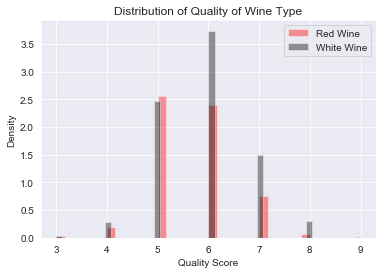

In [66]:
# 와인 종류별 품질의 분포

red_q   = wine.loc[wine["type"]=="red", "quality"]
white_q = wine.loc[wine["type"]=="white", "quality"]

import seaborn as sns
sns.set_style("darkgrid")
# 분포 플롯 그리기
# sns.distplot(red_q, norm_hist=True, kde=True, color="red", label="Red Wine")
sns.distplot(red_q, norm_hist=True, kde=False, color="red", label="Red Wine")
# sns.distplot(red_q, norm_hist=False, kde=True, color="red", label="Red Wine")
# sns.distplot(red_q, norm_hist=False, kde=False, color="red", label="Red Wine")

sns.distplot(white_q, norm_hist=True, kde=False, color="black", label="White Wine")


import matplotlib.pyplot as plt
plt.title("Distribution of Quality of Wine Type")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.legend();


In [29]:
# 와인 종류별 품질 차이의 통계적 유의성 검정
# 귀무가설 정의 -> 표본 추출 -> 통계 기법을 통한 검정(통계적 유의성 검정) -> 귀무가설 기각/채택
# 품질의 차이 "평균"을 검정하는방식은 t-검정과 ANOVA 여기서는 비교변수가 2개 t-검정
wine.groupby("type")["quality"].aggregate(["std","mean"])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [30]:
# 비교값이 2개면 t-검정, 3개이상이면 Anova
# 통계정 검정을 위한 라이브러리 : scipy.stats, statsmodels.api 
import statsmodels.api as sm

# sm.stats.ttest_ind(red_q, white_q) t-검정하다.
# 반환값 t_stat(t-통계량), p_value, df(degree of freedom ) 밀도함수를 그릴때 함수의 기울기
t_stat, p_value, df = sm.stats.ttest_ind(red_q, white_q)
"t-stat : {:.3f}, p-value: {: .4f}".format(t_stat, p_value)

# p-vlaue = 0.000 < 0.05 평균의 차이가 있다.

't-stat : -9.686, p-value:  0.0000'

In [ ]:
#### 상관분석 #####
# 변수들 상이의 상관계수 계산

In [67]:
# 변수들간의 상관관계 산출 corr()
# 상관계수 -1 <= R <= 1, R갑시 1에 가까우면 양의 상관관게, -1에 가까우면 음의 상관관계
# 양의 상관관계 x가 커지면 y도 커진다, 음의 상관관계 x가 커지면 y는 작아진다.
# 독립적이다 = 상관이 없다 는 R = 0, 0에 가까우면 관련성이 없다.
wine_corr = wine.corr()
wine_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [69]:
# 양의 상관관계 변수를 꺼내라.
# alcohol 알콜이 양의 상관성이 가장 크다.
wine_corr.loc[wine_corr["quality"] > 0, "quality"]

citric_acid            0.085532
free_sulfur_dioxide    0.055463
pH                     0.019506
sulphates              0.038485
alcohol                0.444319
quality                1.000000
Name: quality, dtype: float64

In [70]:
# 음의 상관관계 변수를 꺼내라.
# density 밀도가 음의 상관성이 가장 크다.
wine_corr.loc[wine_corr["quality"] < 0, "quality"]

fixed_acidity          -0.076743
volatile_acidity       -0.265699
residual_sugar         -0.036980
chlorides              -0.200666
total_sulfur_dioxide   -0.041385
density                -0.305858
Name: quality, dtype: float64

In [71]:
#### 산점도 행렬 #####
# 산점도 행렬을 위한 데이터 준비

In [73]:
red_sample = wine.loc[wine["type"]=="red", :]
white_sample = wine.loc[wine["type"]=="white", :]

In [90]:
import numpy as np
red_idx   = np.random.choice(red_sample.index, replace=True, size=200)
white_idx = np.random.choice(white_sample.index, replace=True, size=200)

In [91]:
wine_sample = red_sample.loc[red_idx, ].append(white_sample.loc[white_idx, ])
wine_sample["quality"].count()

400

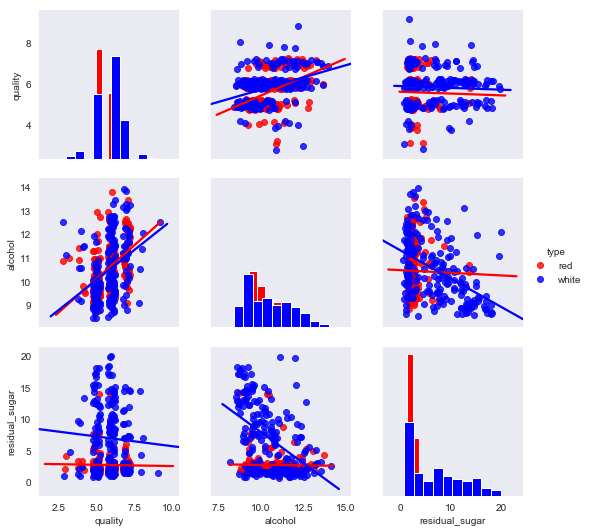

In [92]:
import seaborn as sns

sns.set_style("dark")
sns.pairplot(wine_sample, vars = ["quality", "alcohol", "residual_sugar"],
            kind="reg", plot_kws={"ci":False, "x_jitter":0.25, "y_jitter":0.25},
            diag_kind="hist", diag_kws={"bins":10, "alpha":1},
            hue="type", palette=dict(red="red", white="blue", markers=["o","s"]))

# 히스토그램 => 알코올 도수의 평균과 표준편차는 두그룹이 비슷함, 단) 잔여당의 평균과 표준편차 는 화이트와인이 더 큼.
# 회귀선 => 알코올 도수가 증가하면 품질이 높아짐, 잔여당이 증가하면 품질이 낮아짐.

In [93]:
###### 실습 #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [98]:
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                      sep=";", header=0)
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                      sep=";", header=0)

In [104]:
redwine["type"] = "red"
whitewine["type"] = "white"
redwine.shape, whitewine.shape

((1599, 13), (4898, 13))

In [103]:
# 레드와인과 와이트 와인을 합친다.
wine = redwine.append(whitewine)
wine.shape

(6497, 13)

In [105]:
# describe()는 연속형 데이터의 요약통계를 보여준다, 범부형인  type은 제외됨.
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [107]:
# 해당 항목의 값의 count를 추출한다.
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [108]:
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [110]:
# type으로 groupby하고 quality접근 후 값의 count를 구한다.
wine.groupby("type")["quality"].value_counts()

type   quality
red    5           681
       6           638
       7           199
       4            53
       8            18
       3            10
white  6          2198
       5          1457
       7           880
       8           175
       4           163
       3            20
       9             5
Name: quality, dtype: int64

In [113]:
# type으로 groupby하고 quality접근 후 4분위수를 구한다.
wine.groupby("type")["quality"].quantile([0.25,0.5,0.75]).unstack("type")

type,red,white
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0


In [114]:
# 그룹 별 집합 함수들에 대한 결과 확인하기 대표로 평균과 표준편차
wine.groupby("type")["quality"].aggregate(["std", "mean"])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [119]:
# 와인 종류별 quality t-검정
import statsmodels.api as sm

# quality값을 레드와 와이트를 구분하여 가져온다.
req_q   = wine.loc[wine["type"]=="red", "quality"]
white_q = wine.loc[wine["type"]=="white", "quality"]

# sm.stats.ttest_ind(req_q, white_q)[0]=t통계량 [1]=p-value [2]=자유도
# p-value가 0.05보다 작으니 귀무가설 기각 -> 레드와인과 와이트와인으 평균의 차이가 있다.
sm.stats.ttest_ind(req_q, white_q)
sm.stats.ttest_ind(req_q, white_q)[1] < 0.05

True

In [131]:
# 상관분석. quality와 다른 변수들간의 상관분석.  [[]] 이렇게 감싸주면 DataFrame형태로 변환함.
wine_corr = wine.corr()
wine_corr[["quality"]]

,quality
fixed acidity,-0.076743
volatile acidity,-0.265699
citric acid,0.085532
residual sugar,-0.036980
chlorides,-0.200666
free sulfur dioxide,0.055463
total sulfur dioxide,-0.041385
density,-0.305858
pH,0.019506
sulphates,0.038485


In [134]:
#양의 상관성와 음의 상관성을 구분해보고, 절대값을 사용하여 음/양의 상관성이 가장 큰 값을 찾아본다.
# wine_corr.loc[wine_corr["quality"] > 0, "quality"]
# wine_corr.loc[wine_corr["quality"] < 0, "quality"]
wine_corr.loc[np.abs(wine_corr["quality"]) > 0.3, "quality"]

density   -0.305858
alcohol    0.444319
quality    1.000000
Name: quality, dtype: float64

In [ ]:
##### 단순 선형 회귀 #####
★ 단순 선형 회귀의 개요
    - 회귀의 목표는 연속형 반응 변수의 값을 예측하는것
    - 단순 선형 회귀란 설명변수인 단일특징(x)과 단일 반응 변수(y) 간에 선형 관계가 있다고 가정하고 초평면이라고 하는 선형
      평면을 이용해 모델링한 것
    - 단순 회귀는 설명 변수의 차원(1)과 반응 변수의 차원(1), 모두 2개의 차원을 가지며, 
      초평면은 한 차원 낮은 1차원이 됨(1차원의 초평면은 선)
        
      y = α + βx
      y : 반응변수의 예측값, 절편 항 α와 계수 β: 알고리즘을 통해 학습하게 되는 모델의 파라미터, x : 설명변수.
                    
★ 최소 제곱법 
    - OLS(Ordinary Least Squares)또는 LLS(Linear Least Squares)로 부름
    - 단순 선형 회귀에서 모델을 최적화하는 파라미터 값을 훈련 데이터로부터 학습하는 방법
    - 비용함수 : 손실함수. 모델의 오차를 정의하고 측정하기 위해 사용.
    - 잔차 : residual. 훈련 오차로 훈련 데이터의 관측 값과 모델에 의한 예측값의 차이.
    - 예측 오차 : prediction error. 테스트 오차로 테스트 데이터의 관측 값과 모델에 의한 예측 값의 차이
    - 잔차의 함을 최소화 => 값을 예측할 수 있는 추정기를 만들 수 있음.
     
    
★ 비용함수를 사용한 모델의 적합화 척도 : RSS
    - 반응 변수의 예측값이 훈련 데이터의 관측 값과 가까워지면 모델이 적합화되었다고 할 수 있음.
    - 모델 적합화의 척도 : 잔차 제곱합(RSS. Residual Sum of Squares)
                     n
      RSS = SSres = ∑(yi - f(xi)²
                     i=1
       yi : i번째 훈련 데이터에 대한 반은 변수의 관측값
       f(xi) :i번째 훈련 데이터에 대한 반응 변수의 예측값
                      
- 단순 선형 회귀식     :  y = α + βx   
- 비용 함수를 최소화하는 α값과 β값을 찾는 것이 목표
- β를 계산하기 위해 x의 분산과 x와 y의 공분산을 계산
                                n                     
                      var(x)  = ∑(xi - x바)²              
                               i=1
                              ----------------
                                  n - 1
                      
                                n                     
                      cov(x,y)  = ∑(xi - x바)(yi - y바)              
                               i=1
                              ----------------
                                  n - 1
                                            
    x바:x의 평균, xi:x의 i번째 훈련 데이터의 값, y바:y의 평균, yi:y의 i번째 관측 값, n:훈련 데이터의 개수.
                          cov(x, y)
-  β의 값 계산  : β = --------------
                           var(x)
-  α의 값 계산  : α = y바 - βx바
                      x바=x의 평균, y바=y의 평균, (x바, y바):모델이 반드시 지나가야 하는 센트로이드 좌표.
                      

In [ ]:
##### 다중 선형 회귀 #####
★ 다중 선형 회귀의 개요
    - 다중 선형 회귀란 설명 변수인 다수의 특징과 단일 반응 변수 간에 선형 관계가 있다고 가정 하고,
      초평면이라고 하는 선형 평면을 이용해 모델링한 것
    - 다중 회귀는 설명 변수의 n차원과 반응 변수의 1차원, 모두 n+1개의 차원을 가지며, 
      초평면은 한차원 낮은 n차원이 됨.
      ※다중 선형 회귀를 시각화 하려면, 차원축소나 아이소맵 같은 기술을 사용해야함.
        
        y= α + β1x1 + β2x2 + β3x3 + ... + βnxn
        y : 반응변수의 예측값, 절편 항 α와 계수 βn: 알고리즘을 통해 학습하게 되는 모델의 파라미터, xn : 설명변수.
    
★ 다중 선형 회귀의 벡터 정리   
    - 선형 회귀 모델의 벡터 표기법
      Y = Xβ
        Y1     α + βx1     1 x1
        Y2     α + βx1     1 x1
        .   =    .        =   .     * α
        .        .            .        β
        .        .            .
        Yn     α + βxn     1 x1
        
        Y:반응 변수의 예측 값을 가진 열 벡터
        β:알고리즘을 통해 학습하게 되는 모델의 파라미터 값을 갖는 열벡터
        X : 설명변수 값을 갖는 m x n 차원 행렬로 m은 훈련 데이터(행)의 개수 , n은 특징(열)의 개수
            
     - 훈련 데이터로 부터 X와 Y의 값을 알고 있으므로 비용함수를 최소화하는 β를 계산
        [행렬 연산에서 나누기가 없으므로 역행렬을 사용해야 하고, 역행렬을 사용하려면 역함수를 사용하려면 정방 행렬이어야함.]
        
        전치행렬(행과 열을 바꾼다:Transpose) -> 정방행렬 -> 역행렬.로 만든다.
        
        Y = Xβ , β = (X의전치행렬X)-1승 X전치행렬 Y
        

In [ ]:
##### 다항 회귀 #####
★ 다항 회귀의 개요
    - 다항 회귀란 반응 변수와 다항식으로 표현된 특징 사이의 선형 관계를 모델링 할 수 있는 다중 선형 회귀의 특수한 형태
    - 특징을 변환한 후 다중 선형 회귀에서와 같은 방식으로 설명 변수와 반응 변수의 비선형 관계를 모델링함.
    - 단일 설명 변수의 단일 특징을 사용하고 있지만 모델의 항은 n개
       y = α + β1x + β2x² + ... + βnxn승 
       y:반응 변수의 예측값, α와 계수 β: 알고리즘을 통해 학습하게 되는 모델의 파라미터, xn : 설명변수.
        

In [ ]:
##### 선형 회귀 정리 #####
1.선형회귀 모델을 생성하기에 앞서 상관분석, 산점도행렬 등을 이용해 데이터에 대한 탐색적 분석을 실행합니다.
2.단순 선형 회귀란 설명변수인 단일 특징과 단일 반응 변수 간에 선형 관계가 있다고
  가정하고 초평면이라고 하는 선형 평면을 이용해 모델링한 것이다.
3.다중 선형 회귀는 설명 변수인 다수의 특징과 단일 반응 변수간에 선형 관계가 있다고 가정하고 
   초평면이라고 하는 선형 평면을 이용해 모델링한 것이다.
4.다항 회귀는 설명 변수와 반응 변수의 비선형 관계를 모델링 한다.
5.회귀 모델 성능의 기본 평가지료는 결정계수 R²를 이용해 측정 합니다.